In [30]:
import matplotlib.pyplot as plt
import numpy as np

### 1) Open Image

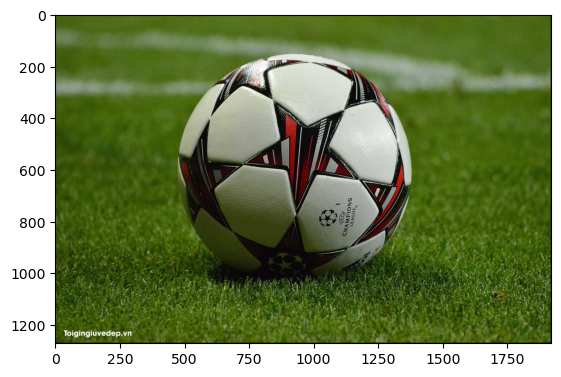

In [31]:
im = plt.imread('bong.jpg')
imlist=[im]
plt.imshow(im);

### 2) color imaging

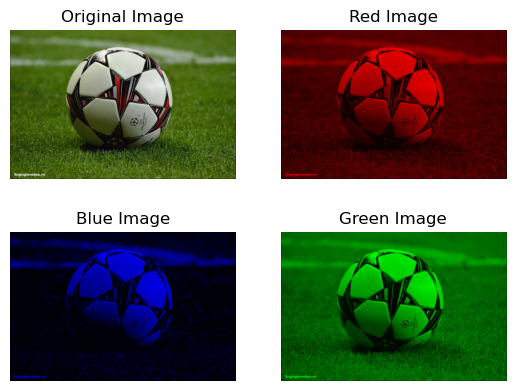

In [32]:
imR=np.zeros_like(im)
imR[:,:,0]=im[:,:,0]
imG=np.zeros_like(im)
imG[:,:,1]=im[:,:,1]
imB=np.zeros_like(im)
imB[:,:,2]=im[:,:,2]
imlist=[im,imR,imB,imG]
mapping={0:'Original Image',1:'Red Image',2:'Blue Image',3:'Green Image'}
fig,ax=plt.subplots(2,2)
ax=ax.flatten()
for i in range(4):
    ax[i].imshow(imlist[i])
    ax[i].set_title(mapping[i])
    ax[i].axis('off')

### 3) gray image

[[ 4  7  3 ...  1  7  2]
 [ 8 68 78 ... 84 81  3]
 [ 1 76 82 ... 75 90  1]
 ...
 [ 3 72 59 ... 58 63  2]
 [ 1 68 55 ... 59 57  5]
 [ 9  3  2 ...  0  3  5]]


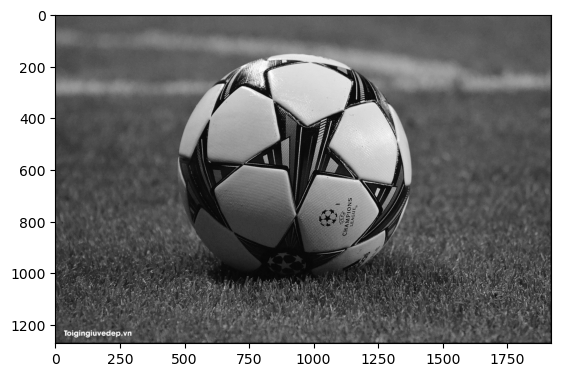

In [33]:
from PIL import Image
gray=np.array(Image.open('bong.jpg').convert('L'))
print(gray)
plt.imshow(gray, cmap='gray');

### 4) Negative Image ( Phép biến đổi âm bản)

In [34]:
#Negative Image
def negative(gray):
  return 255-gray


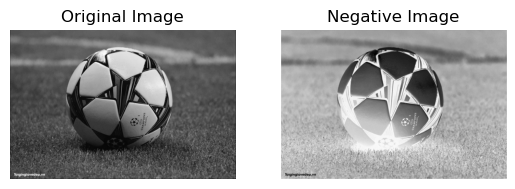

In [35]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title("Original Image")
plt.axis('off')
neg=negative(gray)
plt.subplot(1,2,2)
plt.imshow(neg, cmap='gray')
plt.title("Negative Image")
plt.axis('off');

### 5) Thresholding ( Phân ngưỡng)

(-0.5, 1919.5, 1270.5, -0.5)

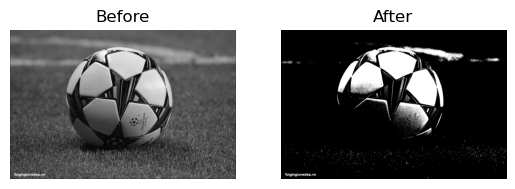

In [36]:
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title("Before")
plt.axis('off')
m=150
gray_ = gray.copy()
for i in range(gray.shape[0]):
  for j in range(gray.shape[1]):
    if gray_[i,j] > m:
        gray_[i,j]=255
    else:
        gray_[i,j]=0
plt.subplot(1,2,2)
plt.imshow(gray_,cmap='gray')
plt.title("After")
plt.axis('off')

### 6) Log Transformation ( Phép biến đổi log)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\3815587827.py:2: RuntimeWarning: divide by zero encountered in log10
  return np.log10(1+gray)*c


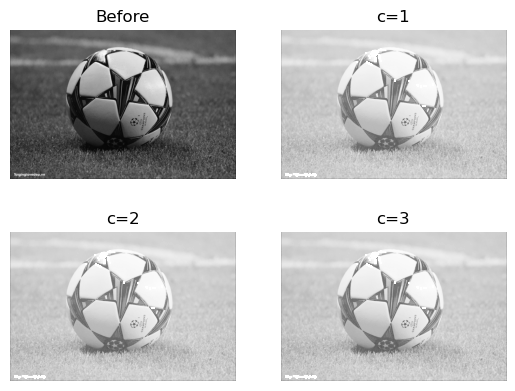

In [37]:
def log(gray,c=1):
    return np.log10(1+gray)*c
log1=log(gray,c=1)
log2=log(gray,c=2)
log3=log(gray,c=3)
log_list=[gray,log1,log2,log3]
fig,ax=plt.subplots(2,2)
ax=ax.flatten()
mapping={0:'Before',1:'c=1',2:'c=2',3:'c=3'}
for i in range(4):
    ax[i].imshow(log_list[i], cmap='gray')
    ax[i].set_title(mapping[i])
    ax[i].axis('off')

### 7) Power-law Transformation ( Phép biến đổi lũy thừa)

(-0.5, 1919.5, 1270.5, -0.5)

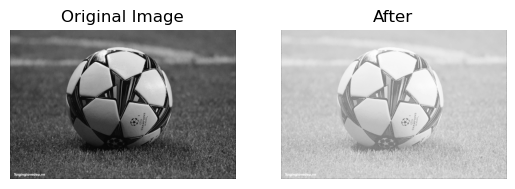

In [38]:
def power(gray,c=1,w=0.5):
    return c*gray**w
powergray=power(gray/255,w=0.2)
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(powergray,cmap='gray')
plt.title ('After')
plt.axis('off')

### 8) Another constrast stretching function (Một chức năng khác để kéo dài độ tương phản)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7776\398691583.py:2: RuntimeWarning: divide by zero encountered in true_divide
  return 1/(1+(m/gray)**E)


(-0.5, 1919.5, 1270.5, -0.5)

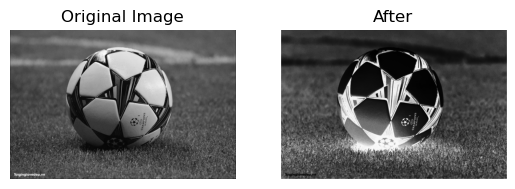

In [39]:
def s(gray,m=0.2,E=0.9):
    return 1/(1+(m/gray)**E)
sgray=s(gray/255,E=-2)
plt.subplot(1,2,1)
plt.imshow(gray,cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(sgray,cmap='gray')
plt.title('After')
plt.axis('off')

### 9) Piece-wise linear transformations (Giãn độ tương phản)

(-0.5, 1919.5, 1270.5, -0.5)

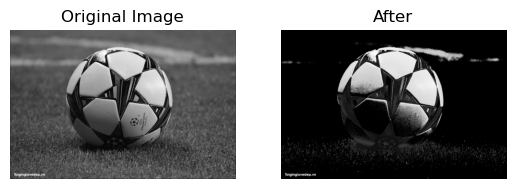

In [40]:
# nếu r1=s1,r2=s2 => phép biến đổi đồng nhất
# nếu s1=0, s2=255 => phân ngưỡng
# thông thường ta xét r1 <= r2 và s1 <= s2
# r1=40,r2=100,s1=80,s2=160
# d1:y=2x
# d2: y=(4x+80)/3
# d3: y=(19x+3060)/31
grays=np.zeros_like(gray)
for i in range(gray.shape[0]):
  for j in range(gray.shape[1]):
    if gray[i,j] < 40:
        grays[i,j]=2*gray[i,j]
    if 40 <= gray_[i,j] <= 100:
        grays[i,j]=(4*gray[i,j]+80)/3
    if 100 < gray_[i,j] <=255:
        grays[i,j]=(19*gray[i,j]+3060)/31
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(grays,cmap='gray')
plt.title('After')
plt.axis('off')

### 10) Intensity level slicing ( Làm mỏng mức xám )

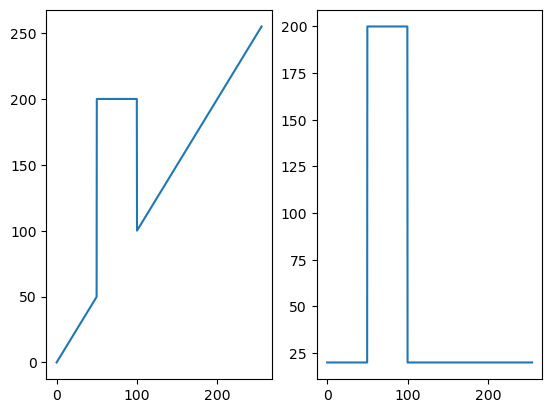

In [41]:
def intensity_level_slicing(r,high,A=50,B=100,low=None,reduce=False):
    arr=r.copy()
    if reduce == True and low != None:
        arr=np.ones_like(arr)*low
    arr[np.where((r>=A)&(r<=B))]=high
    return arr
x=np.linspace(0,255,1000)
fig,ax=plt.subplots(1,2)
ax=ax.flatten()
ax[0].plot(x,intensity_level_slicing(x,high=200))
ax[1].plot(x,intensity_level_slicing(x,high=200,low=20,reduce=True));

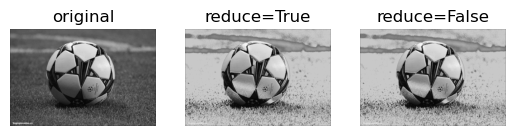

In [42]:
mapping={0:'original',1:'reduce=True',2:'reduce=False'}
slicing_list=[gray,intensity_level_slicing(gray,high=200,reduce=True),intensity_level_slicing(gray,high=200,reduce=False)]
fig1,ax1=plt.subplots(1,3)
ax1=ax1.flatten()
for i in range(3):
    ax1[i].imshow(slicing_list[i], cmap='gray')
    ax1[i].set_title(mapping[i])
    ax1[i].axis('off')

### 11) Bit-plane slicing ( Làm mỏng mặt phẳng bit )

In [43]:
def bit_plane_slicing(r):
    bit_list=[]
    for i in range(8):
        arr=np.zeros_like(r)
        arr[np.where((r>=2**i)&(r<=2**(i+1)))]=r[np.where((r>=2**i)&(r<=2**(i+1)))]
        bit_list.append(arr)
    return bit_list

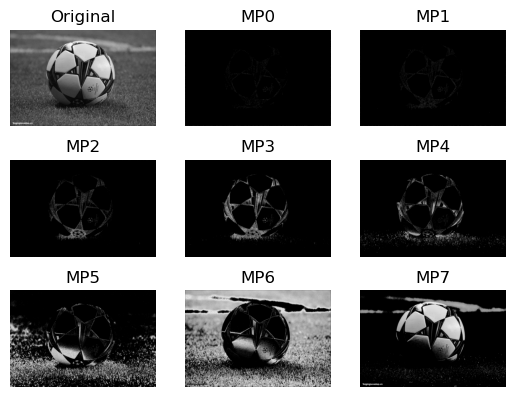

In [44]:
bit_list=[gray]
bit_list.extend(bit_plane_slicing(gray))
mapping={0:'Original',1:'MP0',2:'MP1',3:'MP2',4:'MP3',5:'MP4',6:'MP5',7:'MP6',8:'MP7'}
fig,ax=plt.subplots(3,3)
ax = ax.flatten()
for i in range(9):
    ax[i].imshow(bit_list[i],cmap='gray')
    ax[i].set_title(mapping[i])
    ax[i].axis('off')

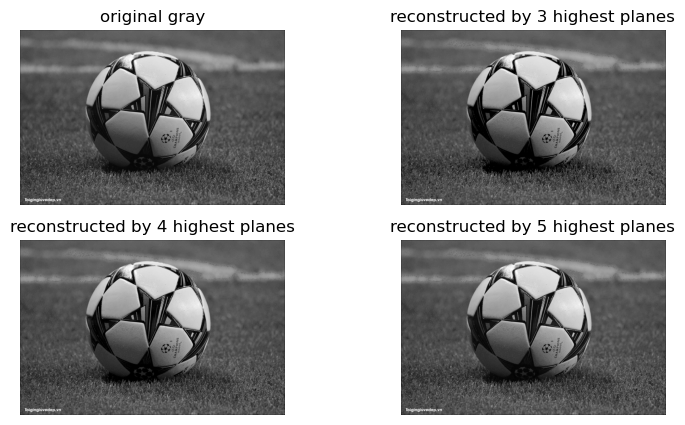

In [45]:
#3,4 and 5 highest bitplanes
mp678=bit_list[8]+bit_list[7]+bit_list[6]
mp5678=bit_list[8]+bit_list[7]+bit_list[6]+bit_list[5]
mp45678=bit_list[8]+bit_list[7]+bit_list[6]+bit_list[5]+bit_list[4]
mp_list=[gray,mp678,mp5678,mp45678]
mp_mapping={0:'original gray',1:'reconstructed by 3 highest planes',2:'reconstructed by 4 highest planes',3:'reconstructed by 5 highest planes'}
fig1,ax1=plt.subplots(2,2)
fig1.set_size_inches(9, 5)
ax1=ax1.flatten()
for i in range(4):
    ax1[i].imshow(mp_list[i],cmap='gray')
    ax1[i].set_title(mp_mapping[i])
    ax1[i].axis('off')

### 12) Histogram ( Lược đồ xám )

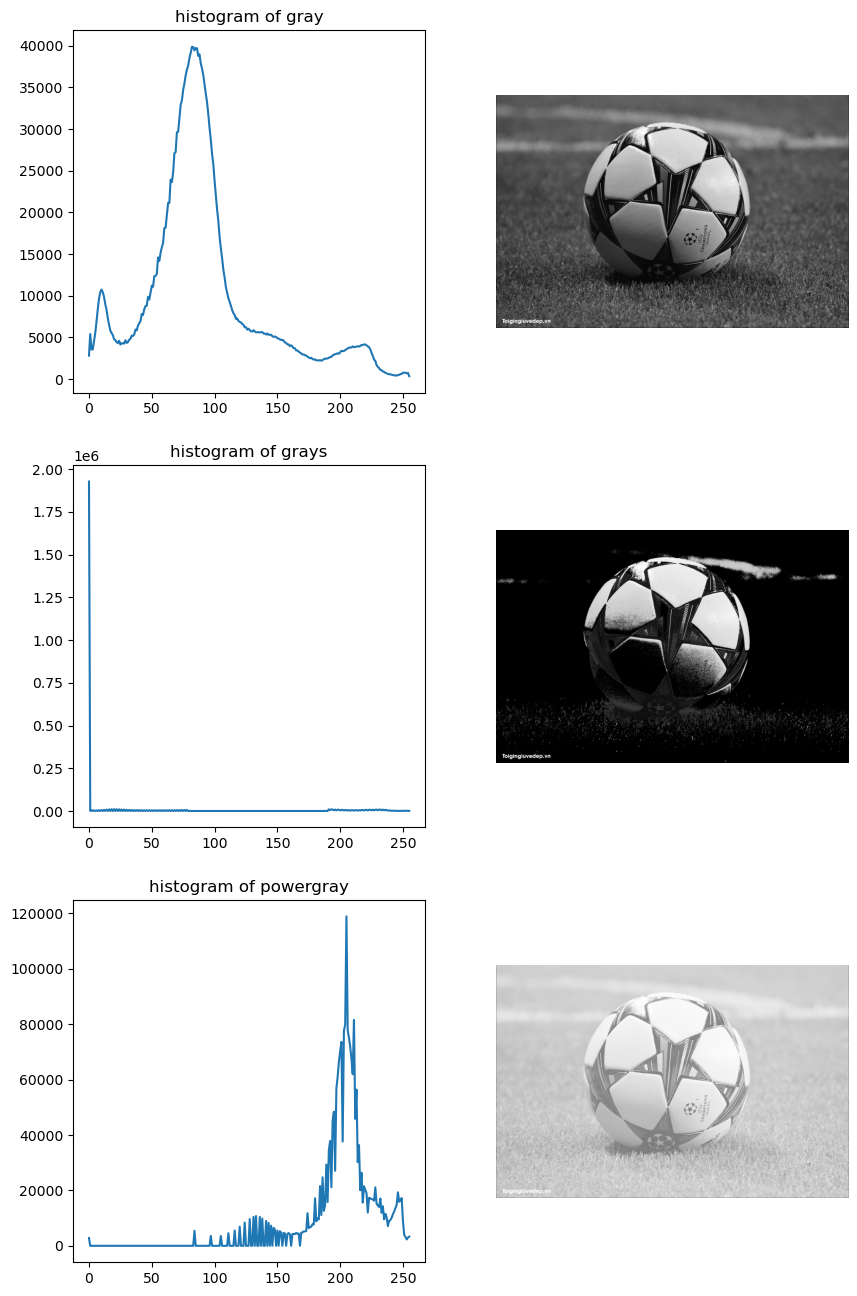

In [46]:
hist_list=[gray,grays,powergray*255]
mapping={0:'histogram of gray',1:'histogram of grays',2:'histogram of powergray'}
fig, ax = plt.subplots(3,2, figsize = (10,16))
for i in range(3):
    hist = np.histogram(hist_list[i].flatten(), bins=256, range=[0,255])
    ax[i,0].plot(hist[0])
    ax[i,0].set_title(mapping[i])
    ax[i,1].imshow(hist_list[i], cmap = 'gray')
    ax[i,1].axis('off')